In [17]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [2]:
news_tables = {}
tickers = ['TSLA']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [7]:
# Read one single day of headlines for 'AMZN' 
tsla = news_tables['TSLA']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
tsla_tr = tsla.findAll('tr')

# for i, table_row in enumerate(tsla_tr):
#     # Read the text of the element 'a' into 'link_text'
#     a_text = table_row.a.text
#     # Read the text of the element 'td' into 'data_text'
#     td_text = table_row.td.text
#     # Print the contents of 'link_text' and 'data_text' 
#     print(a_text)
#     print(td_text)
#     # Exit after printing 4 rows of data
#     if i == 3:
#         break

China Signal Users Report Difficulty Accessing Messaging App
Mar-15-21 11:36PM  
Bitcoin Losses Accelerate After Weekend Rally to Record High
11:17PM  
NTSB sends team to Detroit to investigate violent Tesla crash
11:04PM  
Dow Jones Futures Fall As Bitcoin Tumbles From Record Highs; This EV Leader Surges Again
11:01PM  


In [ ]:
news_

In [8]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['TSLA',
  'Mar-15-21',
  '11:36PM',
  'China Signal Users Report Difficulty Accessing Messaging App'],
 ['TSLA',
  'Mar-15-21',
  '11:17PM',
  'Bitcoin Losses Accelerate After Weekend Rally to Record High'],
 ['TSLA',
  'Mar-15-21',
  '11:04PM',
  'NTSB sends team to Detroit to investigate violent Tesla crash'],
 ['TSLA',
  'Mar-15-21',
  '11:01PM',
  'Dow Jones Futures Fall As Bitcoin Tumbles From Record Highs; This EV Leader Surges Again'],
 ['TSLA',
  'Mar-15-21',
  '08:54PM',
  "UPDATE 2-U.S. safety agency probes 'violent' Tesla crash in Detroit"],
 ['TSLA',
  'Mar-15-21',
  '06:46PM',
  "U.S. safety agency probes 'violent' Tesla crash in Detroit"],
 ['TSLA',
  'Mar-15-21',
  '05:56PM',
  "Elon Musk's Tweet About Selling NFTs Song As NFT Gets $100,000 Bid"],
 ['TSLA',
  'Mar-15-21',
  '05:08PM',
  "Tesla Model 3 Surpasses VW ID.3 In Germany, Becomes Country's No. 2 EV Bestseller In February"],
 ['TSLA',
  'Mar-15-21',
  '05:04PM',
  'Major Tech Supplier Stops Selling Verkada Came

In [10]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codezhere/nltk_data...


True

In [11]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,TSLA,2021-03-15,11:36PM,China Signal Users Report Difficulty Accessing...,0.255,0.745,0.000,-0.3400
1,TSLA,2021-03-15,11:17PM,Bitcoin Losses Accelerate After Weekend Rally ...,0.252,0.748,0.000,-0.4019
2,TSLA,2021-03-15,11:04PM,NTSB sends team to Detroit to investigate viol...,0.452,0.548,0.000,-0.7650
3,TSLA,2021-03-15,11:01PM,Dow Jones Futures Fall As Bitcoin Tumbles From...,0.000,1.000,0.000,0.0000
4,TSLA,2021-03-15,08:54PM,UPDATE 2-U.S. safety agency probes 'violent' T...,0.200,0.593,0.207,0.0258


In [12]:
parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,TSLA,2021-03-15,11:36PM,China Signal Users Report Difficulty Accessing...,0.255,0.745,0.000,-0.3400
1,TSLA,2021-03-15,11:17PM,Bitcoin Losses Accelerate After Weekend Rally ...,0.252,0.748,0.000,-0.4019
2,TSLA,2021-03-15,11:04PM,NTSB sends team to Detroit to investigate viol...,0.452,0.548,0.000,-0.7650
3,TSLA,2021-03-15,11:01PM,Dow Jones Futures Fall As Bitcoin Tumbles From...,0.000,1.000,0.000,0.0000
4,TSLA,2021-03-15,08:54PM,UPDATE 2-U.S. safety agency probes 'violent' T...,0.200,0.593,0.207,0.0258
...,...,...,...,...,...,...,...,...
95,TSLA,2021-03-11,08:00PM,Can Fuel Cell Cars Compete With The EV Boom?,0.000,1.000,0.000,0.0000
96,TSLA,2021-03-11,04:35PM,Stock Market Today: S&P 500 Sets New High as B...,0.000,0.753,0.247,0.5574
97,TSLA,2021-03-11,04:03PM,EV Startup That Drew Apple Interest Takes On T...,0.000,0.812,0.188,0.4588
98,TSLA,2021-03-11,03:53PM,Video Shows Tesla Model 3 Accelerating Away Fr...,0.000,1.000,0.000,0.0000


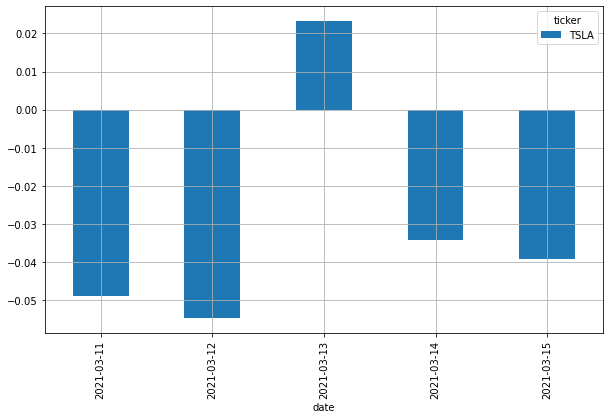

In [13]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [16]:
parsed_and_scored_news.to_csv('finviz_headlines.csv', index=False)